

---
路徑記得改成自己的


---




# 掛接雲端

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# 輸入影像



In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import re

upload_folder = "/content/"

# 1. 先讀取上傳前已有的檔案
existing_files = set(os.listdir(upload_folder))

print("Existing files before upload:", existing_files)
print("Please select files to upload.")

# 2. 上傳，Colab會自動存檔（可能自動改名）
uploaded = files.upload()

# 3. 取得上傳後的檔案清單
all_files_after_upload = set(os.listdir(upload_folder))

# 4. 找出剛剛上傳的檔案（包含自動改名的）
new_uploaded_files = all_files_after_upload - existing_files

final_files_to_use = []

for filename in new_uploaded_files:
    # 尋找是否有對應的「原名」存在
    # 先嘗試去掉可能的 (1), (2)... 後綴判斷
    # 例： "file (1).jpg" -> "file.jpg"
    match = re.match(r"^(.*) \(\d+\)(\.[^.]+)$", filename)
    if match:
        original_name = match.group(1) + match.group(2)
        if original_name in existing_files:
            # 刪除這個多餘的重複檔案
            os.remove(os.path.join(upload_folder, filename))
            print(f"Deleted duplicate file: {filename}, using existing file: {original_name}")
            if original_name not in final_files_to_use:
                final_files_to_use.append(original_name)
        else:
            # 沒有既存同名檔案，這是新檔案
            final_files_to_use.append(filename)
    else:
        # 不是改名檔，直接加入
        final_files_to_use.append(filename)

# 若使用者只上傳沒重複，直接用原檔名
if not final_files_to_use:
    # 意外狀況，fallback用原上傳檔名
    final_files_to_use = list(new_uploaded_files)

print("\nFinal files to process:")
print(final_files_to_use)

# 5. 顯示這些影像
for img_file in final_files_to_use:
    try:
        img_path = os.path.join(upload_folder, img_file)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(img_file)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Could not read or display image file: {img_file}. Error: {e}")

image_files = final_files_to_use

Existing files before upload: {'.config', 'sample_data'}
Please select files to upload.


KeyboardInterrupt: 

# 方法一 ：轉 LAB 色彩

In [ ]:
# @title
if not image_files:
    print("No images to process.")
else:
    for img_file in image_files:
        try:
            # 讀取影像 (BGR 格式)
            img_bgr = cv2.imread(img_file)
            if img_bgr is None:
                raise ValueError("Image not found or invalid format.")

            # 轉換為 LAB 格式
            img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
            l, a, b = cv2.split(img_lab)

            print(f"Processing file: {img_file}")

            # 顯示 LAB 各通道：L, A, B
            plt.figure(figsize=(18, 5))

            plt.subplot(1, 3, 1)
            im1 = plt.imshow(l, cmap='gray')
            plt.title(f"L Channel: {img_file}")
            plt.axis('off')
            plt.colorbar(im1)

            plt.subplot(1, 3, 2)
            im2 = plt.imshow(a, cmap='gray')
            plt.title(f"A Channel: {img_file}")
            plt.axis('off')
            plt.colorbar(im2)

            plt.subplot(1, 3, 3)
            im3 = plt.imshow(b, cmap='gray')
            plt.title(f"B Channel: {img_file}")
            plt.axis('off')
            plt.colorbar(im3)

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Could not process image file {img_file}. Error: {e}")
            print("Ensure OpenCV is installed and the file is a valid image.")

Could not process image file A1_20250430.JPG. Error: Image not found or invalid format.
Ensure OpenCV is installed and the file is a valid image.
Could not process image file B3_20250510.JPG. Error: Image not found or invalid format.
Ensure OpenCV is installed and the file is a valid image.
Could not process image file B1_20250411.JPG. Error: Image not found or invalid format.
Ensure OpenCV is installed and the file is a valid image.
Could not process image file A3_20250504.JPG. Error: Image not found or invalid format.
Ensure OpenCV is installed and the file is a valid image.
Could not process image file B1_20250419.JPG. Error: Image not found or invalid format.
Ensure OpenCV is installed and the file is a valid image.
Could not process image file C2_20250417.JPG. Error: Image not found or invalid format.
Ensure OpenCV is installed and the file is a valid image.
Could not process image file B2_20250419.JPG. Error: Image not found or invalid format.
Ensure OpenCV is installed and the f

In [ ]:
# @title
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2

# Define globals
l_min = l_max = a_min = a_max = b_min = b_max = None
current_lab_mask = None
img_file_to_process = image_files[0] if image_files else None

# Function to apply LAB threshold and return the mask
def get_lab_mask(img_rgb, l_min, l_max, a_min, a_max, b_min, b_max):
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR) # Convert back to BGR for cv2.cvtColor to LAB
    img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
    lower_bound = (l_min, a_min, b_min)
    upper_bound = (l_max, a_max, b_max)
    mask = cv2.inRange(img_lab, lower_bound, upper_bound)
    return mask

# Load the image
if img_file_to_process is not None:
    img_bgr = cv2.imread(img_file_to_process)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    def update_lab_overlay(lmin, lmax, amin, amax, bmin_val, bmax_val):
        # Declare globals inside the function properly
        global l_min, l_max, a_min, a_max, b_min, b_max, current_lab_mask
        print("wait...")
        # Store slider values into globals
        l_min, l_max = lmin, lmax
        a_min, a_max = amin, amax
        b_min, b_max = bmin_val, bmax_val

        # Apply mask
        mask = get_lab_mask(img_rgb, l_min, l_max, a_min, a_max, b_min, b_max)
        current_lab_mask = mask

        overlay = np.zeros_like(img_rgb, dtype=np.uint8)
        overlay[mask > 0] = [255, 0, 0]

        output = cv2.addWeighted(img_rgb, 0.7, overlay, 0.3, 0)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img_rgb)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(output)
        plt.title("Threshold Overlay")
        plt.axis("off")
        plt.show()
        print("ok")

    # Show the slider
    print(f"Using image: {img_file_to_process}")
    interact(update_lab_overlay,
             lmin=widgets.IntSlider(min=0, max=255, step=1, value=0, description='L Min'),
             lmax=widgets.IntSlider(min=0, max=255, step=1, value=255, description='L Max'),
             amin=widgets.IntSlider(min=0, max=255, step=1, value=0, description='A Min'),
             amax=widgets.IntSlider(min=0, max=255, step=1, value=255, description='A Max'),
             bmin_val=widgets.IntSlider(min=0, max=255, step=1, value=0, description='B Min'),
             bmax_val=widgets.IntSlider(min=0, max=255, step=1, value=255, description='B Max')
            )
else:
    print("❌ No image to process.")

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


# 方法二 : 轉 HSV

In [ ]:
import cv2

# 假設 image_files 是一個包含影像路徑的 list
# 例如：image_files = ['image1.jpg', 'image2.png']

if not image_files:
    print("No images to process.")
else:
    for img_file in image_files:
        try:
            # 讀取影像 (BGR 格式)
            img_bgr = cv2.imread(img_file)
            if img_bgr is None:
                raise ValueError("Image not found or invalid format.")

            # 轉換為 RGB 格式（顯示用）
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

            # 轉換為 HSV 格式
            img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
            h, s, v = cv2.split(img_hsv)

            print(f"Processing file: {img_file}")

            # 顯示 HSV 各通道：H, S, V
            plt.figure(figsize=(18, 5))

            plt.subplot(1, 3, 1)
            im1 = plt.imshow(h, cmap='hsv')
            plt.title(f"Hue Channel: {img_file}")
            plt.axis('off')
            plt.colorbar(im1)

            plt.subplot(1, 3, 2)
            im2 = plt.imshow(s, cmap='gray')
            plt.title(f"Saturation Channel: {img_file}")
            plt.axis('off')
            plt.colorbar(im2)

            plt.subplot(1, 3, 3)
            im3 = plt.imshow(v, cmap='gray')
            plt.title(f"Value Channel: {img_file}")
            plt.axis('off')
            plt.colorbar(im3)

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Could not process image file {img_file}. Error: {e}")
            print("Ensure OpenCV is installed and the file is a valid image.")


Processing file: A2_20250320.JPG


# 調整 HSV 值

In [ ]:
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Define globals
h_min = h_max = s_min = s_max = v_min = v_max = None
current_water_mask = None
img_file_to_process = image_files[0] if image_files else None

# Function to apply HSV threshold and return the mask
def get_hsv_mask(img_rgb, h_min, h_max, s_min, s_max, v_min, v_max):
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    lower_bound = (h_min, s_min, v_min)
    upper_bound = (h_max, s_max, v_max)
    mask = cv2.inRange(img_hsv, lower_bound, upper_bound)
    return mask

# Load the image
if img_file_to_process is not None:
    img_bgr = cv2.imread(img_file_to_process)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    def update_hsv_overlay(hmin, hmax, smin, smax, vmin_val, vmax_val):
        # Declare globals inside the function properly
        global h_min, h_max, s_min, s_max, v_min, v_max, current_water_mask
        print("wait...")
        # Store slider values into globals
        h_min, h_max = hmin, hmax
        s_min, s_max = smin, smax
        v_min, v_max = vmin_val, vmax_val

        # Apply mask
        mask = get_hsv_mask(img_rgb, h_min, h_max, s_min, s_max, v_min, v_max)
        current_water_mask = mask

        overlay = np.zeros_like(img_rgb, dtype=np.uint8)
        overlay[mask > 0] = [255, 0, 0]

        output = cv2.addWeighted(img_rgb, 0.7, overlay, 0.3, 0)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img_rgb)
        plt.title(f"Original Image: {os.path.basename(img_file_to_process)}")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(output)
        plt.title("Threshold Overlay")
        plt.axis("off")
        plt.show()
        print("ok")

    # Show the slider
    print(f"Using image: {img_file_to_process}")
    interact(update_hsv_overlay,
             hmin=widgets.IntSlider(min=0, max=179, step=1, value=0, description='H Min'),
             hmax=widgets.IntSlider(min=0, max=179, step=1, value=179, description='H Max'),
             smin=widgets.IntSlider(min=0, max=255, step=1, value=0, description='S Min'),
             smax=widgets.IntSlider(min=0, max=255, step=1, value=255, description='S Max'),
             vmin_val=widgets.IntSlider(min=0, max=255, step=1, value=0, description='V Min'),
             vmax_val=widgets.IntSlider(min=0, max=255, step=1, value=255, description='V Max')
            )
else:
    print("❌ No image to process.")


# 查看調整後遮罩結果

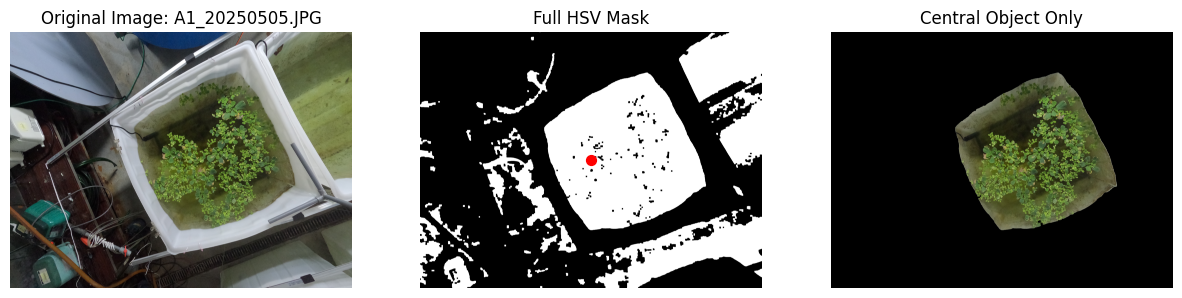

In [ ]:
if not image_files:
    print("No images to process.")
else:
    img_file_to_process = image_files[0]

    # 先決定要使用哪一種 mask（ True: LAB,  False: HSV）
    use_lab_mask = False  # ✅ 這邊你可以手動修改      ★☆☆☆★★★★★☆☆☆★★★★★★☆☆☆★★★★★☆☆☆★★★★★★☆☆☆★★★★★☆☆☆★★★★★

    try:
        img_bgr = cv2.imread(img_file_to_process)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

        # 選擇使用哪一種 mask
        if use_lab_mask:
            if current_lab_mask is None:
                print("No LAB mask has been generated yet. Please adjust LAB sliders first.")
                mask = None
            else:
                mask = current_lab_mask
        else:
            if current_water_mask is None:
                print("No HSV mask has been generated yet. Please adjust HSV sliders first.")
                mask = None
            else:
                mask = current_water_mask

        if mask is not None:
            # 可選用膨脹侵蝕操作
            #"""
            kernel = np.ones((5,5),np.uint8)
            mask = cv2.dilate(mask, kernel, iterations = 5)
            mask = cv2.erode(mask, kernel, iterations = 5)
            mask = cv2.erode(mask, kernel, iterations = 5)
            mask = cv2.dilate(mask, kernel, iterations = 5)
            #"""

            # 尋找輪廓
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if contours:
                img_center_x = img_rgb.shape[1] // 2
                img_center_y = img_rgb.shape[0] // 2

                min_dist = float('inf')
                center_contour = None
                for contour in contours:
                    M = cv2.moments(contour)
                    if M["m00"] != 0:
                        cX = int(M["m10"] / M["m00"])
                        cY = int(M["m01"] / M["m00"])
                        dist = np.sqrt((cX - img_center_x)**2 + (cY - img_center_y)**2)
                        if dist < min_dist:
                            min_dist = dist
                            center_contour = contour

                if center_contour is not None:
                    center_mask = np.zeros_like(mask)
                    cv2.drawContours(center_mask, [center_contour], -1, (255), thickness=cv2.FILLED)

                    result = cv2.bitwise_and(img_rgb, img_rgb, mask=center_mask)

                    # 顯示結果
                    plt.figure(figsize=(15, 5))
                    plt.subplot(1, 3, 1)
                    plt.imshow(img_rgb)
                    plt.title(f"Original Image: {os.path.basename(img_file_to_process)}")
                    plt.axis('off')

                    plt.subplot(1, 3, 2)
                    plt.scatter(img_center_x, img_center_y, color='red', s=50)
                    plt.imshow(mask, cmap='gray')
                    mask_title = "Full LAB Mask" if use_lab_mask else "Full HSV Mask"
                    plt.title(mask_title)
                    plt.axis('off')

                    plt.subplot(1, 3, 3)
                    plt.imshow(result)
                    result_title = "Central Object Only"
                    if use_lab_mask:
                        result_title += " *lab"  # ⭐ 加上這個標籤
                    plt.title(result_title)
                    plt.axis('off')

                    plt.show()
                else:
                    print("Could not find a central contour.")
            else:
                print("No contours found in the mask.")

    except Exception as e:
        print(f"An error occurred: {e}")


# 儲存檔案

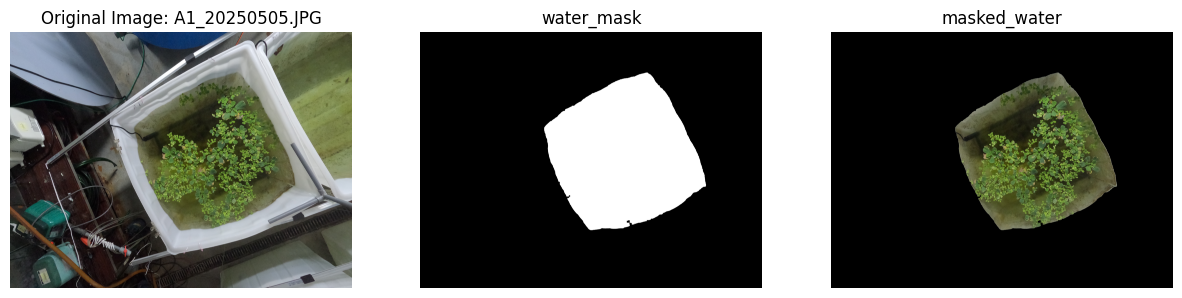

Saved original image to: /content/drive/MyDrive/覆蓋率影像/00.original_images/A1_20250505.JPG
Saved mask image to: /content/drive/MyDrive/覆蓋率影像/01.water_mask/A1_20250505.JPG
Saved masked image to: /content/drive/MyDrive/覆蓋率影像/01.masked_water/A1_20250505.JPG


In [ ]:
### 儲存檔案

# Create directories if they don't exist
# 請先定義這三個資料夾
path = "/content/drive/MyDrive/覆蓋率影像/"
original_folder = path + '00.original_images'
masked_folder = path + '01.masked_water'
mask_folder = path + '01.water_mask'

# 確保資料夾存在
os.makedirs(original_folder, exist_ok=True)
os.makedirs(masked_folder, exist_ok=True)
os.makedirs(mask_folder, exist_ok=True)

try:
    img_bgr = cv2.imread(img_file_to_process)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Find contours in the mask

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        img_center_x = img_rgb.shape[1] // 2
        img_center_y = img_rgb.shape[0] // 2

        min_dist = float('inf')
        center_contour = None
        for contour in contours:
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                dist = np.sqrt((cX - img_center_x)**2 + (cY - img_center_y)**2)
                if dist < min_dist:
                    min_dist = dist
                    center_contour = contour

        if center_contour is not None:
            center_mask = np.zeros_like(mask)
            cv2.drawContours(center_mask, [center_contour], -1, (255), thickness=cv2.FILLED)

            result = cv2.bitwise_and(img_rgb, img_rgb, mask=center_mask)

            # === Display the three images ===
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.imshow(img_rgb)
            plt.title(f"Original Image: {os.path.basename(img_file_to_process)}")
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(center_mask, cmap='gray')
            plt.title("water_mask")
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(result)
            plt.title("masked_water")
            plt.axis('off')
            plt.show()

            # === 儲存三張影像 ===
            filename = os.path.basename(img_file_to_process)
            name, ext = os.path.splitext(filename)

            # 原始影像：轉回 BGR 儲存
            original_path = os.path.join(original_folder, name + ext)
            cv2.imwrite(original_path, img_bgr)
            print(f"Saved original image to: {original_path}")


            # mask（二值）：儲存為灰階
            mask_path = os.path.join(mask_folder, name + ext)
            cv2.imwrite(mask_path, center_mask)
            print(f"Saved mask image to: {mask_path}")

            # 套用後的 RGB 結果：轉成 BGR 再儲存
            result_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
            masked_path = os.path.join(masked_folder, name + ext)
            cv2.imwrite(masked_path, result_bgr)
            print(f"Saved masked image to: {masked_path}")


        else:
            print("Could not find a central contour.")
    else:
        print("No contours found in the image with the given HSV settings.")

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import pandas as pd
import os

try:
    current_lab_mask = use_lab_mask

    if current_lab_mask is True:
        mask_type = "LAB"
        hsv_values = {
            "image_file": os.path.basename(img_file_to_process),
            "h_min": l_min,
            "h_max": l_max,
            "s_min": a_min,
            "s_max": a_max,
            "v_min": b_min,
            "v_max": b_max,
            "mask_type": mask_type
        }
    elif current_water_mask is not None:
        mask_type = "HSV"
        hsv_values = {
            "image_file": os.path.basename(img_file_to_process),
            "h_min": h_min,
            "h_max": h_max,
            "s_min": s_min,
            "s_max": s_max,
            "v_min": v_min,
            "v_max": v_max,
            "mask_type": mask_type
        }
    else:
        raise ValueError("❌ No valid mask found. Please adjust sliders first.")

    output_filename = path + "01.Water_mask_value.csv"
    image_name = hsv_values["image_file"]

    if os.path.exists(output_filename):
        df_existing = pd.read_csv(output_filename)

        # ✅ 補齊缺的欄位（像是 mask_type）
        for key in hsv_values:
            if key not in df_existing.columns:
                df_existing[key] = None

        match_idx = df_existing[df_existing["image_file"] == image_name].index

        if not match_idx.empty:
            # ✅ 重新排列欄位順序，確保所有欄位都能對應
            df_existing.loc[match_idx[0]] = pd.Series(hsv_values).reindex(df_existing.columns)
            df_existing.to_csv(output_filename, index=False)
            print("🔄 CSV updated.")
            print(f"✔ Updated row {match_idx[0] + 1} for image '{image_name}'.")
            print("📄 Row content:")
            print(df_existing.loc[match_idx[0]].to_frame().T.to_string(index=False))
        else:
            df_existing = pd.concat([df_existing, pd.DataFrame([hsv_values])], ignore_index=True)
            df_existing.to_csv(output_filename, index=False)
            print("➕ New entry added.")
            print("📄 Row content:")
            print(pd.DataFrame([hsv_values]).to_string(index=False))
    else:
        df = pd.DataFrame([hsv_values])
        df.to_csv(output_filename, index=False)
        print("🆕 CSV file created.")
        print("📄 Row content:")
        print(df.to_string(index=False))

except NameError as e:
    print(f"❌ Missing variable: {e}")
except Exception as e:
    print(f"❌ Error saving to CSV: {e}")


➕ New entry added.
📄 Row content:
     image_file  h_min  h_max  s_min  s_max  v_min  v_max mask_type
A1_20250505.JPG     18     85     25    255      0    140       HSV


# 調整植物 lab


In [ ]:
if result is None:
    print("No image to process for overlaying threshold area.")
else:
    try:
        # Use the 'result' image (masked water area) for plant detection
        plant_img_rgb = result.copy()

        def update_lab_plant_overlay(l_min, l_max, a_min, a_max, b_min, b_max):
            # Declare global variables to be used later
            global current_plants_mask_lab
            global l_min_plant, l_max_plant, a_min_plant, a_max_plant, b_min_plant, b_max_plant
            print("wait")
            # Save current LAB values as plant-specific globals
            l_min_plant, l_max_plant = l_min, l_max
            a_min_plant, a_max_plant = a_min, a_max
            b_min_plant, b_max_plant = b_min, b_max

            # Compute LAB mask
            mask = get_lab_mask(plant_img_rgb, l_min, l_max, a_min, a_max, b_min, b_max)
            current_plants_mask_lab = mask

            # Create red overlay for mask
            overlay = np.zeros_like(plant_img_rgb, dtype=np.uint8)
            overlay[mask > 0] = [255, 0, 0]  # Red for masked area

            # Blend image and overlay
            alpha = 0.3
            output = cv2.addWeighted(plant_img_rgb, 1 - alpha, overlay, alpha, 0)

            # Plot original and overlay
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(plant_img_rgb)
            plt.title("Image (Water Masked)")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(output)
            plt.title("Threshold Overlay (Plant Mask)")
            plt.axis('off')
            plt.show()
            print("ok")

        print("Using `result` image for interactive LAB threshold overlay (plant region).")

        # Launch interactive sliders
        interact(update_lab_plant_overlay,
                 l_min=widgets.IntSlider(min=0, max=255, step=1, value=l_min, description='L Min:'),
                 l_max=widgets.IntSlider(min=0, max=255, step=1, value=l_max, description='L Max:'),
                 a_min=widgets.IntSlider(min=0, max=255, step=1, value=a_min, description='A Min:'),
                 a_max=widgets.IntSlider(min=0, max=255, step=1, value=a_max, description='A Max:'),
                 b_min=widgets.IntSlider(min=0, max=255, step=1, value=b_min, description='B Min:'),
                 b_max=widgets.IntSlider(min=0, max=255, step=1, value=b_max, description='B Max:')
                );

    except Exception as e:
        print(f"Could not set up interactive LAB threshold overlay for `result`. Error: {e}")

Using `result` image for interactive LAB threshold overlay (plant region).


interactive(children=(IntSlider(value=0, description='L Min:', max=255), IntSlider(value=255, description='L M…

# 調整 HSV 找植物

In [ ]:
if result is None:
    print("No image to process for overlaying threshold area.")
else:
    try:
        water_img_rgb = result.copy()  # Assume result is RGB image

        def update_hsv_overlay(h_min, h_max, s_min, s_max, v_min, v_max):
            # ✅ Declare global variables to be used later
            global current_plants_mask
            global h_min_plant, h_max_plant, s_min_plant, s_max_plant, v_min_plant, v_max_plant
            print("wait")
            # Save current HSV values as plant-specific globals
            h_min_plant, h_max_plant = h_min, h_max
            s_min_plant, s_max_plant = s_min, s_max
            v_min_plant, v_max_plant = v_min, v_max

            # Compute HSV mask
            mask = get_hsv_mask(water_img_rgb, h_min, h_max, s_min, s_max, v_min, v_max)
            current_plants_mask = mask

            # Create red overlay for mask
            overlay = np.zeros_like(water_img_rgb, dtype=np.uint8)
            overlay[mask > 0] = [255, 0, 0]  # Red for masked area

            # Blend image and overlay
            alpha = 0.3
            output = cv2.addWeighted(water_img_rgb, 1 - alpha, overlay, alpha, 0)

            # Plot original and overlay
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(water_img_rgb)
            plt.title(f"Original Image: {os.path.basename(img_file_to_process)}")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(output)
            plt.title("Threshold Overlay (Plant Mask)")
            plt.axis('off')
            plt.show()
            print("ok")

        print("Using `result` image for interactive HSV threshold overlay (plant region).")

        # Launch interactive sliders
        interact(update_hsv_overlay,
                 h_min=widgets.IntSlider(min=0, max=179, step=1, value=h_min, description='H Min:'),
                 h_max=widgets.IntSlider(min=0, max=179, step=1, value=h_max, description='H Max:'),
                 s_min=widgets.IntSlider(min=0, max=255, step=1, value=s_min, description='S Min:'),
                 s_max=widgets.IntSlider(min=0, max=255, step=1, value=s_max, description='S Max:'),
                 v_min=widgets.IntSlider(min=0, max=255, step=1, value=v_min, description='V Min:'),
                 v_max=widgets.IntSlider(min=0, max=255, step=1, value=v_max, description='V Max:')
                );

    except Exception as e:
        print(f"Could not set up interactive HSV threshold overlay for `result`. Error: {e}")


Using `result` image for interactive HSV threshold overlay (plant region).


interactive(children=(IntSlider(value=18, description='H Min:', max=179), IntSlider(value=85, description='H M…

# 查看結果

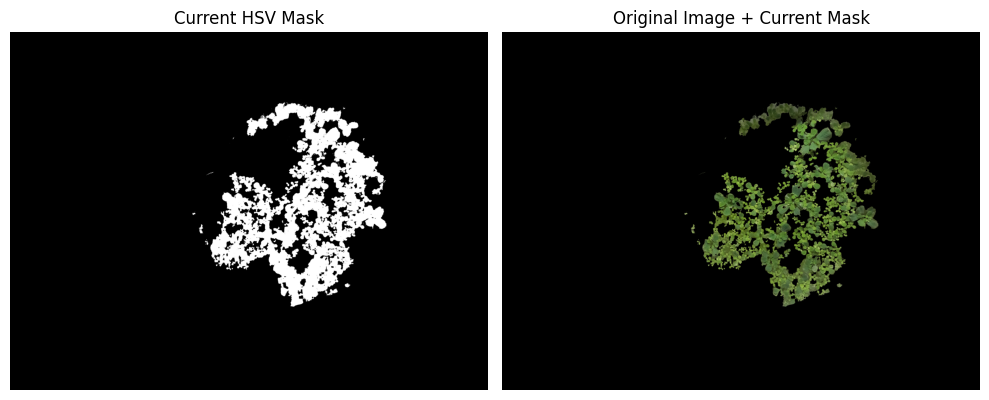

In [ ]:
try:
    # ✅ 你可以改這裡來選擇使用哪種 mask
    use_lab_mask = False  # True for LAB mask, False for HSV mask                  ★☆☆☆★★★★★☆☆☆★★★★★★☆☆☆★★★★★☆☆☆★★★★★


    if result is None:
        print("No image to process for overlaying threshold area.")
    else:
        # ✅ 選擇 mask 來源
        if use_lab_mask == True:
            if current_plants_mask_lab is None:
                print("❌ No LAB mask has been generated yet. Please adjust LAB sliders first.")
                _mask = None
            else:
                _mask = current_plants_mask_lab
        else:
            if current_plants_mask is None:
                print("❌ No HSV mask has been generated yet. Please adjust HSV sliders first.")
                _mask = None
            else:
                _mask = current_plants_mask

        # ✅ 若 mask 存在，開始顯示
        if _mask is not None:
            final_plants_mask = _mask  # 更新目前的 mask

            plt.figure(figsize=(10, 5))

            # 顯示 mask 本身
            plt.subplot(1, 2, 1)
            plt.imshow(final_plants_mask, cmap='gray')
            plt.title(f"Current {'LAB' if use_lab_mask else 'HSV'} Mask")
            plt.axis('off')

            # 原圖 + mask 套用結果
            plants_masked_image = np.zeros_like(result)
            plants_masked_image[final_plants_mask > 0] = result[final_plants_mask > 0]

            plt.subplot(1, 2, 2)
            plt.imshow(plants_masked_image)
            plt.title("Original Image + Current Mask")
            plt.axis('off')

            plt.tight_layout()
            plt.show()
        else:
            print("⚠️ No mask available to display.")

except Exception as e:
    print(f"❌ Error while displaying masked image: {e}")


# 儲存植物檔案

In [ ]:
# Create output folders if not exist
mask_folder = path + "02.plants_mask"
masked_folder = path + "02.masked_plants"
os.makedirs(mask_folder, exist_ok=True)
os.makedirs(masked_folder, exist_ok=True)

try:
    # 1. 取得原始檔名與副檔名
    filename = os.path.basename(img_file_to_process)
    name, ext = os.path.splitext(filename)

    # 2. 儲存植物遮罩（灰階）
    mask_path = os.path.join(mask_folder, name + ext)
    cv2.imwrite(mask_path, final_plants_mask)
    print(f"✅ Saved plant mask to: {mask_path}")

    # 3. 建立 masked 植物影像（只有遮罩區域，其他為黑）
    plants_masked_image = np.zeros_like(result)
    plants_masked_image[final_plants_mask > 0] = result[final_plants_mask > 0]

    # 4. 儲存 masked 植物影像
    masked_path = os.path.join(masked_folder, name + ext)
    plants_masked_bgr = cv2.cvtColor(plants_masked_image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(masked_path, plants_masked_bgr)
    print(f"✅ Saved masked plant image to: {masked_path}")

except Exception as e:
    print(f"❌ Failed to save mask or masked image: {e}")


✅ Saved plant mask to: /content/drive/MyDrive/覆蓋率影像/02.plants_mask/A1_20250505.JPG
✅ Saved masked plant image to: /content/drive/MyDrive/覆蓋率影像/02.masked_plants/A1_20250505.JPG


In [ ]:
import pandas as pd
import os

try:
    # 選擇使用哪種 mask
    use_lab_mask = False  # True for LAB mask, False for HSV mask                       ★☆☆☆★★★★★☆☆☆★★★★★

    if use_lab_mask:
        # 確認 LAB mask 參數是否存在且可用
        if 'current_plants_mask_lab' not in globals() or current_plants_mask_lab is None:
            raise ValueError("❌ No LAB mask has been generated yet. Please adjust LAB sliders first.")

        mask_type = "LAB"
        hsv_values = {
            "image_file": os.path.basename(img_file_to_process),
            "h_min": l_min_plant,
            "h_max": l_max_plant,
            "s_min": a_min_plant,
            "s_max": a_max_plant,
            "v_min": b_min_plant,
            "v_max": b_max_plant,
            "mask_type": mask_type
        }
    else:
        # 確認 HSV mask 參數是否存在且可用
        if 'current_plants_mask' not in globals() or current_plants_mask is None:
            raise ValueError("❌ No HSV mask has been generated yet. Please adjust HSV sliders first.")

        mask_type = "HSV"
        hsv_values = {
            "image_file": os.path.basename(img_file_to_process),
            "h_min": h_min_plant,
            "h_max": h_max_plant,
            "s_min": s_min_plant,
            "s_max": s_max_plant,
            "v_min": v_min_plant,
            "v_max": v_max_plant,
            "mask_type": mask_type
        }

    output_filename = path + "02.Plants_mask_value.csv"
    image_name = hsv_values["image_file"]

    if os.path.exists(output_filename):
        df_existing = pd.read_csv(output_filename)

        # 補齊欄位，避免缺少 mask_type 等欄位導致錯誤
        for key in hsv_values.keys():
            if key not in df_existing.columns:
                df_existing[key] = None

        match_idx = df_existing[df_existing["image_file"] == image_name].index

        if not match_idx.empty:
            df_existing.loc[match_idx[0]] = pd.Series(hsv_values).reindex(df_existing.columns)
            df_existing.to_csv(output_filename, index=False)
            print("🔄 CSV updated.")
            print(f"✔ Image '{image_name}' already existed — values updated in row {match_idx[0] + 1}.")
            print("📄 Saved row content:")
            print(df_existing.loc[match_idx[0]].to_frame().T.to_string(index=False))
        else:
            df_existing = pd.concat([df_existing, pd.DataFrame([hsv_values])], ignore_index=True)
            df_existing.to_csv(output_filename, index=False)
            print("➕ New entry added to CSV.")
            print(f"✔ Image '{image_name}' did not exist — values appended as new row {len(df_existing)}.")
            print("📄 Saved row content:")
            print(pd.DataFrame([hsv_values]).to_string(index=False))
    else:
        df = pd.DataFrame([hsv_values])
        df.to_csv(output_filename, index=False)
        print("🆕 CSV file created.")
        print(f"✔ Image '{image_name}' saved as the first row in new file '{output_filename}'.")
        print("📄 Saved row content:")
        print(df.to_string(index=False))

except NameError as e:
    print(f"❌ Missing variable: {e}. Please adjust sliders first.")
except Exception as e:
    print(f"❌ Error saving to CSV: {e}")


➕ New entry added to CSV.
✔ Image 'A1_20250505.JPG' did not exist — values appended as new row 24.
📄 Saved row content:
     image_file  h_min  h_max  s_min  s_max  v_min  v_max mask_type
A1_20250505.JPG     38     85     55    255     45    255       HSV




---


---




# 顯示原始影像、水面範圍、植物範圍

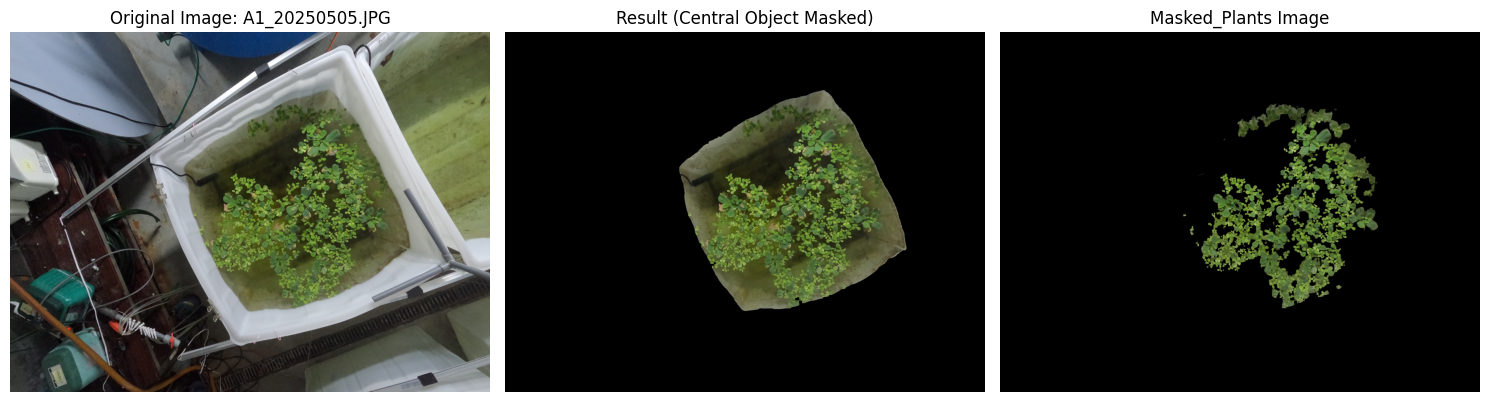

In [ ]:
# prompt: 顯示原始影像，result, masked_image

# Display the three images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
# 標題包含檔案名稱
plt.title(f"Original Image: {os.path.basename(img_file_to_process)}")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(result)
plt.title("Result (Central Object Masked)")
plt.axis('off')

# 轉
final_plants = cv2.cvtColor(final_plants_mask, cv2.COLOR_GRAY2RGB)
plt.subplot(1, 3, 3)
plt.imshow(plants_masked_image)
plt.title("Masked_Plants Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# B C H W ARGMAX
